## [과제] 아래 가이드에 따라서 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
거래건수
- id: 10000건
고객별 속성 데이터
- cusno : 1 ~ 10000번 일련번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요
- 20년도대비 21년도 고가제품 구매율 상승
- 연말 구매율 상승
- 저녁시간대 구매율 상승
- 20~30대의 고가제품 구입률 높음
- 여성구매비율 높음 
#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
import time
import warnings
warnings.filterwarnings(action='ignore')

In [221]:
#고객 데이터 만들기

np.random.seed(0)
columns = ['cusno','gender','age',"region"]
a=np.zeros((1000,4))
index = [np.arange(1000)]
df_client = pd.DataFrame(a,index,columns=columns)

df_client.cusno = np.arange(1,1001).reshape(-1,1)
df_client.age = np.random.randint(10,81,size=(1000,1))
df_client.gender = gender=np.random.choice([0,1],size=(1000,1))
df_client.region=np.random.randint(0,11,size=(1000,1))

In [222]:
df_client.describe()

,cusno,gender,age,region
count,1000.000000,1000.000000,1000.00000,1000.0000
mean,500.500000,0.519000,44.03000,5.0680
std,288.819436,0.499889,20.57013,3.1896
min,1.000000,0.000000,10.00000,0.0000
25%,250.750000,0.000000,26.75000,2.0000
50%,500.500000,1.000000,44.00000,5.0000
75%,750.250000,1.000000,61.00000,8.0000
max,1000.000000,1.000000,80.00000,10.0000


In [223]:
#데이터 저장
df_client.to_pickle("./dataset/df_client_data.pkl")
df_client=pd.read_pickle("df_client_data.pkl")   # 파일 날라가서 다시

In [50]:
#상품데이터 만들기
np.random.seed(0)
columns = ["price"]
a=np.zeros(30)
index = [np.arange(1,31)]
df_product = pd.DataFrame(a,index,columns=columns)

for i in range(0,30):

    if i <10:
        df_product.price[i] = np.random.randint(1000,10000)
    elif i<20:
        df_product.price[i] = np.random.randint(10000,30000)
    elif i>=20:
        df_product.price[i] = np.random.randint(30000,50001)
        
df_product.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, (1,) to (30,)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   30 non-null     float64
dtypes: float64(1)
memory usage: 1.6 KB


In [51]:
#요일정하기 & 가격배정

def add_pri(x):
    li=list(np.array(df_product['price'].tolist()))
    return li[x-1]

def f_week(x):
    x=datetime.strptime(x,"%Y-%m-%d")
    k=x.weekday()
    days=['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[k]

In [130]:
n=10000
np.random.seed(0)
columns = ["id","cusno","gender","age","date","Day","Time","pro","pri","quan","amount"]
a=np.zeros((n,11))
index = [np.arange(0,n)]
df_sales = pd.DataFrame(a,index,columns=columns)

#고객ID 넣기
df_sales.id=np.arange(1,n+1)
for i in range(n):
    k=np.random.randint(0,1000)
    df_sales.cusno[i]=df_client.cusno[k]
    df_sales.gender[i]=df_client.gender[k]
    df_sales.age[i]=df_client.age[k]
    
#날짜처리
random_date = pd.period_range(start = '2020-01-01', end = '2021-12-31',freq='D')
random_date_li=list(random_date.strftime('%Y-%m-%d'))
hour_li=list(np.arange(24))
df_sales.date=np.random.choice(random_date_li,size=(n,1))
df_sales.Day = df_sales.date.apply(lambda x:f_week(x))
df_sales.Time=np.random.choice(hour_li,size=(n,1))

#제품코드 넣기
df_sales.pro=np.random.randint(1,31,size=(n,1))
df_sales['pri']=df_sales.pro.apply(lambda x : add_pri(x))
df_sales.quan=np.random.randint(1,101,size=(n,1))
df_sales.amount=df_sales['pri']*df_sales['quan']

In [224]:
df_sales.to_pickle("./dataset/df_sales_ori_data.pkl")
df_data=pd.read_pickle("df_sales_ori_data.pkl")
df_data.describe()

,id,cusno,gender,age,Time,pro,pri,quan,amount
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,498.378600,0.389300,43.70250,11.553600,15.505500,20482.937800,50.695500,1.040642e+06
std,2886.89568,287.764039,0.487616,20.45742,6.910087,8.639215,14496.613227,28.572477,1.025977e+06
min,1.00000,1.000000,0.000000,10.00000,0.000000,1.000000,1705.000000,1.000000,1.705000e+03
25%,2500.75000,251.000000,0.000000,26.00000,5.000000,8.000000,6874.000000,26.000000,2.554230e+05
50%,5000.50000,495.000000,0.000000,43.00000,12.000000,15.000000,16036.000000,51.000000,6.675600e+05
75%,7500.25000,750.000000,1.000000,61.00000,18.000000,23.000000,31871.000000,75.000000,1.507200e+06
max,10000.00000,1000.000000,1.000000,80.00000,23.000000,30.000000,48430.000000,100.000000,4.843000e+06


In [225]:
val=df_data.sort_values(['cusno'])
val

,id,cusno,gender,age,date,Day,Time,pro,pri,quan,amount
8388,8389,1.0,0.0,54.0,2020-07-24,FRI,9,19,15072.0,84,1266048.0
7439,7440,1.0,0.0,54.0,2021-02-12,FRI,3,19,15072.0,14,211008.0
3189,3190,1.0,0.0,54.0,2020-08-30,SUN,11,1,3732.0,36,134352.0
1632,1633,1.0,0.0,54.0,2021-02-27,SAT,12,1,3732.0,32,119424.0
9864,9865,1.0,0.0,54.0,2020-07-23,THU,23,15,16216.0,81,1313496.0
...,...,...,...,...,...,...,...,...,...,...,...
3832,3833,1000.0,0.0,37.0,2021-11-01,MON,5,18,12163.0,27,328401.0
5912,5913,1000.0,0.0,37.0,2021-04-15,THU,7,22,48430.0,90,4358700.0
1583,1584,1000.0,0.0,37.0,2021-01-11,MON,5,26,45186.0,39,1762254.0
5227,5228,1000.0,0.0,37.0,2020-03-31,TUE,9,20,14851.0,84,1247484.0


In [137]:
group_cusno=df_data.groupby(['cusno'])
# grouped=group_cusno.get_group(('id'))
group_cusno.describe()

id                                                              \
       count         mean          std     min      25%     50%      75%   
cusno                                                                      
1.0     14.0  4559.214286  3136.288109   667.0  1919.00  3809.0  7189.75   
2.0      3.0  5521.333333  2526.003233  2993.0  4259.50  5526.0  6785.50   
3.0     13.0  4828.000000  2209.749194  1897.0  3991.00  4101.0  6429.00   
4.0     13.0  5175.769231  3089.870147   619.0  3367.00  5375.0  8022.00   
5.0      9.0  3880.666667  3085.333045   471.0  2103.00  3194.0  4863.00   
...      ...          ...          ...     ...      ...     ...      ...   
996.0    7.0  6322.571429  2449.741133  3552.0  4453.00  5592.0  8341.50   
997.0   11.0  5949.545455  2565.418148  1814.0  4249.00  5837.0  8002.50   
998.0   10.0  4653.800000  3233.935092   662.0  2002.75  3971.5  7171.00   
999.0    9.0  4912.555556  3870.903516   278.0  1099.00  4720.0  8422.00   
1000.0  14.0  3322.642857  2773.241275    85.0  1262.25  2575.0  4912.50   

               gender       ...   quan        amount                \
           max  count mean  ...    75%    max  count          mean   
cusno                       ...                                      
1.0     9865.0   14.0  0.0  ...  75.25   85.0   14.0  6.341022e+05   
2.0     8045.0    3.0  1.0  ...  76.50  100.0    3.0  8.678150e+05   
3.0     9105.0   13.0  0.0  ...  84.00   99.0   13.0  1.545892e+06   
4.0     9603.0   13.0  1.0  ...  80.00  100.0   13.0  1.143385e+06   
5.0     9800.0    9.0  1.0  ...  62.00   93.0    9.0  6.711956e+05   
...        ...    ...  ...  ...    ...    ...    ...           ...   
996.0   9525.0    7.0  1.0  ...  85.50   94.0    7.0  1.018797e+06   
997.0   9395.0   11.0  1.0  ...  91.00   97.0   11.0  1.370926e+06   
998.0   9580.0   10.0  0.0  ...  42.50   84.0   10.0  5.950559e+05   
999.0   9971.0    9.0  1.0  ...  46.00   89.0    9.0  1.353377e+06   
1000.0  9207.0   14.0  0.0  ...  90.00   96.0   14.0  1.427515e+06   

                                                                            
                 std       min       25%        50%         75%        max  
cusno                                                                       
1.0     6.282555e+05   73315.0  153516.0   333188.0  1193855.50  2060585.0  
2.0     5.700422e+05  412704.0  548122.5   683541.0  1095370.50  1507200.0  
3.0     1.289279e+06  218934.0  543046.0  1037824.0  2437200.00  3795624.0  
4.0     8.746516e+05    3599.0  415828.0  1199984.0  1485100.00  2665974.0  
5.0     9.204097e+05  107684.0  143030.0   235215.0   396552.00  2432963.0  
...              ...       ...       ...        ...         ...        ...  
996.0   7.646884e+05  102764.0  527560.0   785764.0  1409442.00  2369048.0  
997.0   1.238423e+06   55432.0  304291.5  1251009.0  2476689.00  3408930.0  
998.0   5.172638e+05   38691.0  238296.0   476603.5   648621.50  1628711.0  
999.0   1.439284e+06   46035.0  251937.0   603000.0  2227780.00  4310270.0  
1000.0  1.411084e+06   53730.0  371196.0   735561.5  2539592.25  4358700.0  

[1000 rows x 64 columns]

In [87]:
def age_group(x):
    if x<20:
        return "10대"
    elif x<30:
        return "20대"
    elif x<40:
        return "30대"
    elif x<50:
        return "40대"
    elif x<60:
        return "50대"
    elif x<70:
        return "60대"
    elif x>=70:
        return "70대"
def price_group(x):
    if x<=10:
        return "저가제품"
    elif x<=20:
        return "중가제품"
    elif x>20:
        return "고가제품"

In [165]:
df_data['Age_group'] = df_data.age.apply(lambda x:age_group(x))
df_data['pri_group'] = df_data.pro.apply(lambda x:price_group(x))
df_data.head()

,id,cusno,gender,age,date,Day,Time,pro,pri,quan,amount,Age_group,pri_group
0,1,685.0,0.0,75.0,2021-11-08,MON,3,20,14851.0,65,965315.0,70대,중가제품
1,2,560.0,0.0,55.0,2020-04-28,TUE,1,10,3599.0,41,147559.0,50대,저가제품
2,3,630.0,0.0,77.0,2020-09-23,WED,9,14,26921.0,94,2530574.0,70대,중가제품
3,4,193.0,1.0,19.0,2021-05-17,MON,14,21,37877.0,4,151508.0,10대,고가제품
4,5,836.0,0.0,39.0,2020-11-03,TUE,6,23,31871.0,72,2294712.0,30대,고가제품


In [ ]:
#20년도대비 21년도 구매율 상승 & 연말 구매율 상승

In [166]:
#년도, 월 그룹만들기
df_data['Year'] = pd.to_datetime(df_data.date).dt.year
df_data['Month'] = pd.to_datetime(df_data.date).dt.month
df_data.head()

,id,cusno,gender,age,date,Day,Time,pro,pri,quan,amount,Age_group,pri_group,Year,Month
0,1,685.0,0.0,75.0,2021-11-08,MON,3,20,14851.0,65,965315.0,70대,중가제품,2021,11
1,2,560.0,0.0,55.0,2020-04-28,TUE,1,10,3599.0,41,147559.0,50대,저가제품,2020,4
2,3,630.0,0.0,77.0,2020-09-23,WED,9,14,26921.0,94,2530574.0,70대,중가제품,2020,9
3,4,193.0,1.0,19.0,2021-05-17,MON,14,21,37877.0,4,151508.0,10대,고가제품,2021,5
4,5,836.0,0.0,39.0,2020-11-03,TUE,6,23,31871.0,72,2294712.0,30대,고가제품,2020,11


In [183]:
#20년도대비 21년도 구매율 상승
random_date_21 = pd.period_range(start = '2021-10-15', end = '2021-12-31',freq='D')
li=list(random_date_21.strftime('%Y-%m-%d'))

for i in range(2000):
    df_data.loc[(df_data['Year']==2020)&(df_data['cusno']<200)&(df_data['id']==i),['date']]=str(np.random.choice(li))

#업데이트
df_data['Year'] = pd.to_datetime(df_data.date).dt.year
df_data['Month'] = pd.to_datetime(df_data.date).dt.month
df_data.Day = df_data.date.apply(lambda x:f_week(x))

In [184]:
#20년도 연말 구매율 상승

random_date_20 = pd.period_range(start = '2020-10-30', end = '2020-12-31',freq='D')
li=list(random_date_20.strftime('%Y-%m-%d'))

for i in range(2000):
    k=np.random.randint(0,10000)
    df_data.loc[(df_data['Year']==2020)&((df_data['Month']==3)|(df_data['Month']==4))&(df_data['id']==k),['date']] = str(np.random.choice(li))
#업데이트
df_data['Year'] = pd.to_datetime(df_data.date).dt.year
df_data['Month'] = pd.to_datetime(df_data.date).dt.month
df_data.Day = df_data.date.apply(lambda x:f_week(x))

In [199]:
#시간(1~6 -> 19~24)
hour_li=[19,20,21,22,23,0]
for i in range(5000):
    k=np.random.randint(0,10000)
    df_data.loc[((df_data['Time']>=1)&(df_data['Time']<=6))&(df_data['id']==k),['Time']] = np.random.choice(hour_li) 

In [200]:
#확인
group_date=df_data.groupby(['Year'])
print(group_date.count())
group_m=df_data.groupby(['Year','Month'])
print(group_m.id.count())
group_time=df_data.groupby(['Time'])
print(group_time.id.count())

        id  cusno  gender   age  date   Day  Time   pro   pri  quan  amount  \
Year                                                                          
2020  4849   4849    4849  4849  4849  4849  4849  4849  4849  4849    4849   
2021  5151   5151    5151  5151  5151  5151  5151  5151  5151  5151    5151   

      Age_group  pri_group  Month  
Year                               
2020       4849       4849   4849  
2021       5151       5151   5151  
Year  Month
2020  1        412
      2        375
      3        350
      4        338
      5        398
      6        353
      7        399
      8        428
      9        384
      10       448
      11       475
      12       489
2021  1        428
      2        349
      3        457
      4        429
      5        378
      6        401
      7        379
      8        420
      9        398
      10       476
      11       521
      12       515
Name: id, dtype: int64
Time
0     590
1     256
2     247
3     247
4  

In [205]:
#인사이트로 수정한 데이터
df_data.to_pickle("df_sales_re_data.pkl")

In [80]:
pdf1 = pd.pivot_table(df_sales,
                    index = ['Year','Age_group'], #행 위치에 들어갈 열
                    columns ='Month',  #열 위치에 들어갈 열
                    values = 'quan',  #데이터로 사용할 열
                    aggfunc = 'mean')  #데이터 집계함수    계산하는 함수
                     
print(pdf1)

Month                  1          2          3          4          5   \
Year Age_group                                                          
2020 10대        50.630137  52.438596  55.321429  48.546875  50.746479   
     20대        52.406780  47.518519  46.890625  49.254545  53.281250   
     30대        53.714286  51.064516  46.848101  50.885714  51.171875   
     40대        46.827586  52.153846  53.971831  46.152778  47.127660   
     50대        49.611111  45.208333  49.133333  47.310345  52.150943   
     60대        46.595745  48.183333  46.800000  50.650794  54.196429   
     70대        54.436620  55.089286  50.120690  46.703704  49.704918   
2021 10대        49.785714  53.013889  52.896552  52.600000  50.275862   
     20대        47.209677  56.072727  47.723077  49.875000  45.688889   
     30대        49.652174  54.789474  57.092105  48.550725  52.634615   
     40대        50.718750  44.966102  51.413333  54.444444  54.189655   
     50대        49.020408  54.346939  49.293103  52

In [226]:
df=pd.read_pickle("df_sales_re_data.pkl")

,quan
gender,
0.0,308683
1.0,198272


<AxesSubplot:xlabel='gender'>

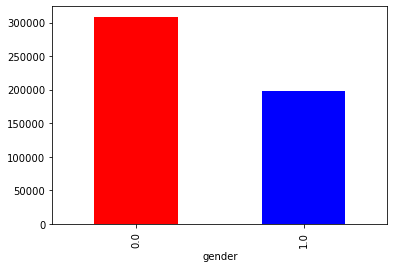

In [227]:
#인사이트 
## 여성 구매비율 높음(남성 1 여성 0)
a= df['quan'].groupby(df['gender']).sum().to_frame()
display(a)
display(df['quan'].groupby(df['gender']).sum().plot.bar(color=['r','b']))

,id
gender,
0.0,6107
1.0,3893


<AxesSubplot:xlabel='gender'>

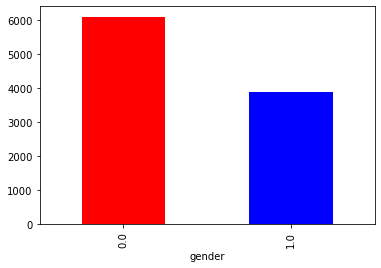

In [228]:
a= df['id'].groupby(df['gender']).count().to_frame()
display(a)
display(df['id'].groupby(df['gender']).count().plot.bar(color=['r','b']))

,id
Year,
2020,4849
2021,5151


<AxesSubplot:xlabel='Year'>

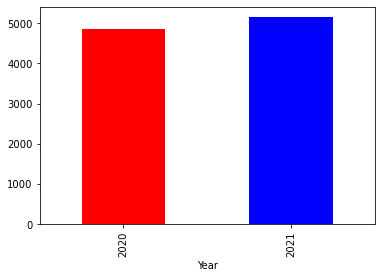

In [229]:
#인사이트
##20년도대비 21년도 구매율 상승
a= df['id'].groupby(df['Year']).count().to_frame()
display(a)
display(df['id'].groupby(df['Year']).count().plot.bar(color=['r','b']))

,quan
Year,
2020,244910
2021,262045


<AxesSubplot:xlabel='Year'>

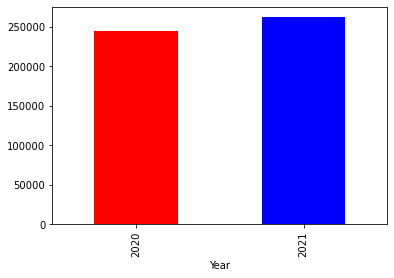

In [230]:
a= df['quan'].groupby(df['Year']).sum().to_frame()
display(a)
display(df['quan'].groupby(df['Year']).sum().plot.bar(color=['r','b']))

,id
Month,
1,840
2,724
3,807
4,767
5,776
6,754
7,778
8,848
9,782


<AxesSubplot:xlabel='Month'>

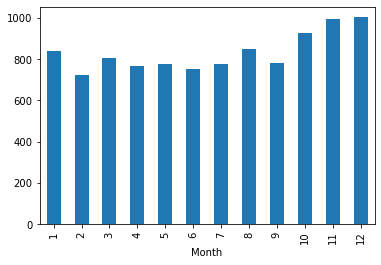

In [231]:
#인사이트
##연말 구매율 상승
a= df['id'].groupby(df['Month']).count().to_frame()
display(a)
display(df['id'].groupby(df['Month']).count().plot.bar())

,quan
Month,
1,41943
2,37111
3,40992
4,37735
5,39949
6,37882
7,41816
8,41841
9,37995


<AxesSubplot:xlabel='Month'>

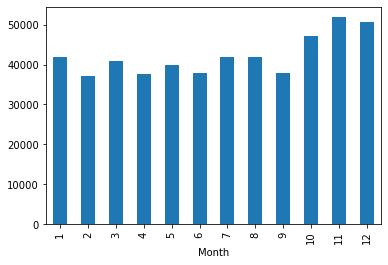

In [232]:
a= df['quan'].groupby(df['Month']).sum().to_frame()
display(a)
display(df['quan'].groupby(df['Month']).sum().plot.bar())

In [239]:
pdf1 = pd.pivot_table(df,
                    index = ['Year'], #행 위치에 들어갈 열
                    columns ='Month',  #열 위치에 들어갈 열
                    values = 'quan',  #데이터로 사용할 열
                    aggfunc = 'sum')  #데이터 집계함수    계산하는 함수
                     
print(pdf1)

Month     1      2      3      4      5      6      7      8      9      10  \
Year                                                                          
2020   20859  18923  17391  16001  20280  18116  21465  21128  18364  22484   
2021   21084  18188  23601  21734  19669  19766  20351  20713  19631  24603   

Month     11     12  
Year                 
2020   24994  24905  
2021   26939  25766  


<AxesSubplot:xlabel='Time'>

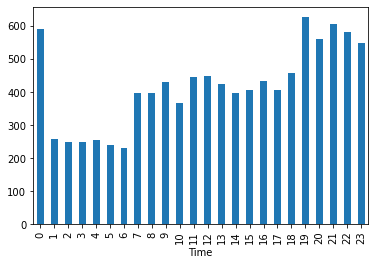

In [241]:
#인사이트
##저녁시간 구매율상승
display(df['id'].groupby(df['Time']).count().plot.bar())

<AxesSubplot:xlabel='Time'>

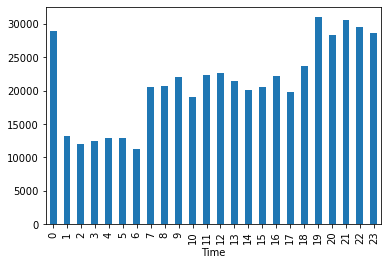

In [242]:
display(df['quan'].groupby(df['Time']).sum().plot.bar())

In [81]:
pdf1 = pd.pivot_table(df_sales,
                    index = ['Year'], #행 위치에 들어갈 열
                    columns ='Month',  #열 위치에 들어갈 열
                    values = 'quan',  #데이터로 사용할 열
                    aggfunc = 'mean')  #데이터 집계함수    계산하는 함수
                     
print(pdf1)

Month         1          2          3          4          5          6   \
Year                                                                      
2020   50.875294  50.331620  49.799097  48.527523  51.283654  51.696000   
2021   49.261682  52.114613  51.643326  50.662005  52.034392  49.291771   

Month         7          8          9          10         11         12  
Year                                                                     
2020   53.929612  49.561086  47.900256  49.736264  53.019231  50.472477  
2021   53.696570  49.316667  49.324121  52.052995  51.679654  49.102564  
